In [1]:
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *
from dwave.embedding.chain_strength import scaled

In [3]:
input_qubits = [47,8,7,6,5,4,3,2,30,27,76,116,156,196,236,276]
input1 = [47,8,7,6,5,4,3,2]
input2 = [30,27,76,116,156,196,236,276]

In [10]:
bqm = process_unicorn_file("./factorize_35.qubo")
print(bqm.offset, len(bqm.quadratic.keys()))
print(minimize_qubo(bqm, False))
bqm.fix_variable(848, 1)
bqm.fix_variable(849, 0)
print(bqm.offset, len(bqm.quadratic.keys()))

270.0 2091
(-949.9999999999991, {848: 1, 849: 0})
266.0 2089


In [12]:
for i in range(15, 150):
    embedding = get_embedding(bqm, i) # 8
    chain_lengths = []
    for (key, chain) in embedding.items():
        chain_lengths.append(len(chain))
    print(i, count_qubits_used(embedding))
# 

15 2178
16 2123
17 1862
18 1859
19 2131
20 2027
21 2399
22 2160
23 1835
24 1940
25 2077
26 2283
27 1902
28 1868
29 1963
30 2077
31 1958
32 2160
33 2055
34 2031
35 2098
36 1955
37 2054
38 2100
39 0
40 0
41 2111
42 2148
43 2185
44 2270
45 2065
46 2341
47 1992
48 2023


KeyboardInterrupt: embedding cancelled by keyboard interrupt

49 1789


<AxesSubplot:ylabel='Count'>

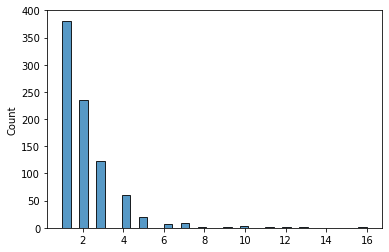

In [13]:
embedding = get_embedding(bqm, 8) # 8
chain_lengths = []
for (key, chain) in embedding.items():
    chain_lengths.append(len(chain))
print(i, count_qubits_used(embedding))
sns.histplot(chain_lengths)

In [17]:
sampler = get_greedy_quantum_sampler(embedding)

In [23]:
from greedy import SteepestDescentComposite
from dwave.system import DWaveCliqueSampler


qubit_offsets = get_0_qubits_offsets()
qpu_offsets = get_qubit_offset_ranges()
advance_annealing_of_unused(embedding, qubit_offsets)

In [18]:
sampleset = sampler.sample(bqm, 
                           num_reads=1000, 
                           chain_strength=1.75, 
                           auto_scale=True)
print(sampleset.first.energy)
get_avg_energy(sampleset)

50.0


82.89

In [16]:
sampleset_offsets = sampler.sample(bqm, num_reads=1000, 
                                   anneal_schedule=[[0.0,1.0],[2.5,0.5],[17.5,0.5],[20.0,1.0]],
                                   answer_mode='raw', 
                                   chain_strength=1.75, 
                                   initial_state=sampleset.first.sample, 
                                   reinitialize_state=True)
print(sampleset_offsets.first.energy)
print(get_avg_energy(sampleset_offsets))

NameError: name 'sampler' is not defined

In [46]:
minimize_qubo(bqm, False)

(-949.9999999999991, {848: 1, 849: 0})

In [50]:
bqm.fix_variable(848, 1)
bqm.fix_variable(849, 0)

In [15]:
from copy import deepcopy
temp_bqm = deepcopy(bqm)
for input_qubit in input_qubits:
    temp_bqm.fix_variable(input_qubit, sampleset.first.sample[input_qubit])

NameError: name 'sampleset' is not defined

In [8]:
from dwave.preprocessing.lower_bounds import roof_duality

In [9]:
roof_duality.fix_variables(bqm)

AttributeError: 'function' object has no attribute 'fix_variables'

In [26]:
bqm = process_unicorn_file("./factorize_35.qubo")
bqm.scale(0.75)
fix_constant_integer(bqm, input1, 7)
fix_constant_integer(bqm, input2, 5)
roof_duality(bqm, strict=False)

(-674.8593749999995, {369: 1, 848: 1, 849: 0})

In [23]:
bqm = process_unicorn_file("./factorize_35.qubo")
bqm.scale(0.5)
fix_constant_integer(bqm, input1, 5)
fix_constant_integer(bqm, input2, 7)
roof_duality(bqm, strict=False)

(-449.90625, {369: 1, 848: 1, 849: 0})

In [27]:
bqm.fix_variable(369, 1)
bqm.fix_variable(848, 1)
bqm.fix_variable(849, 0)